In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("marks.csv")

In [3]:
df.info() # checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Name                                   101 non-null    object
 1   roll number                            101 non-null    object
 2   Department                             101 non-null    object
 3   Email address                          101 non-null    object
 4   Quiz: Mid1 (Real)                      101 non-null    object
 5   Quiz: Quiz (Unit-1) (Real)             101 non-null    object
 6   Quiz: Quiz-2 (Real)                    101 non-null    object
 7   Quiz: Python Mid-2 examination (Real)  101 non-null    object
 8   Quiz: QUIZ3                            101 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [4]:
# I will check if any missing value in columns
df.isna().sum()

Name                                     0
roll number                              0
Department                               0
Email address                            0
Quiz: Mid1 (Real)                        0
Quiz: Quiz (Unit-1) (Real)               0
Quiz: Quiz-2 (Real)                      0
Quiz: Python Mid-2 examination (Real)    0
Quiz: QUIZ3                              0
dtype: int64

In [5]:
df.head(5)

,Name,roll number,Department,Email address,Quiz: Mid1 (Real),Quiz: Quiz (Unit-1) (Real),Quiz: Quiz-2 (Real),Quiz: Python Mid-2 examination (Real),Quiz: QUIZ3
0,GEMBALI RAMANI,hu21csen0100525,CSE,rgembali@gitam.in,8.33,3.34,4.92,6.67,8.5
1,SURINENI SATHVIK TEJA,hu21csen0100531,CSE,ssurinen@gitam.in,9.67,5,4.25,9.67,15.83
2,POLUREDDY VEERADATTA REDDY,hu21csen0100537,CSE,vpolured@gitam.in,8.33,3.93,5,8.33,12
3,KANUPARTHI AMULYA,hu21csen0100539,CSE,akanupar@gitam.in,7,3.58,4.92,9.33,12.83
4,MIDIDHIDDI SAI POOJITHA,hu21csen0100553,CSE,smididhi@gitam.in,7.67,2.21,2.92,8.33,10.17


In [6]:
df.replace(['-'],0, inplace = True)

In [7]:
df = df.set_axis(["Name", "roll_number","Department","Email","Mid 1","Quiz 1","Quiz 2","Mid 2","Quiz 3"], axis=1)
df.head(1)

,Name,roll_number,Department,Email,Mid 1,Quiz 1,Quiz 2,Mid 2,Quiz 3
0,GEMBALI RAMANI,hu21csen0100525,CSE,rgembali@gitam.in,8.33,3.34,4.92,6.67,8.5


In [8]:
#converting the data type to int
df['Quiz 1'] = pd.to_numeric(df['Quiz 1'], errors="coerce")
df['Quiz 2'] = pd.to_numeric(df['Quiz 2'], errors="coerce")
df['Quiz 3'] = pd.to_numeric(df['Quiz 3'], errors="coerce")
#https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
df['Mid 1'] = pd.to_numeric(df['Mid 1'], errors="coerce")
df['Mid 2'] = pd.to_numeric(df['Mid 2'], errors="coerce")

In [9]:
#calculating the total quiz marks
df['Total quizzes'] = df['Quiz 1'] + df['Quiz 2'] + df['Quiz 3']

In [10]:
#calculating the total mid marks
df['Total mids'] = df['Mid 1'] + df['Mid 2']

In [11]:
df.head()

,Name,roll_number,Department,Email,Mid 1,Quiz 1,Quiz 2,Mid 2,Quiz 3,Total quizzes,Total mids
0,GEMBALI RAMANI,hu21csen0100525,CSE,rgembali@gitam.in,8.33,3.34,4.92,6.67,8.50,16.76,15.00
1,SURINENI SATHVIK TEJA,hu21csen0100531,CSE,ssurinen@gitam.in,9.67,5.00,4.25,9.67,15.83,25.08,19.34
2,POLUREDDY VEERADATTA REDDY,hu21csen0100537,CSE,vpolured@gitam.in,8.33,3.93,5.00,8.33,12.00,20.93,16.66
3,KANUPARTHI AMULYA,hu21csen0100539,CSE,akanupar@gitam.in,7.00,3.58,4.92,9.33,12.83,21.33,16.33
4,MIDIDHIDDI SAI POOJITHA,hu21csen0100553,CSE,smididhi@gitam.in,7.67,2.21,2.92,8.33,10.17,15.30,16.00


In [12]:
#calculating the total marks
df["Total internal"] = df["Total mids"]+ df["Total quizzes"]

In [13]:
# creating a new dataframe for the final output
final_data = df.filter(["Email address", "roll_number", "Name","Department", "Total mids", "Total quizzes", "Total internal"], axis=1)

In [14]:
final_data['roll_number'] = final_data['roll_number'].str.upper()

In [15]:
final_data.set_index("roll_number", inplace=True)

In [16]:
final_data.head()

,Name,Department,Total mids,Total quizzes,Total internal
roll_number,,,,,
HU21CSEN0100525,GEMBALI RAMANI,CSE,15.00,16.76,31.76
HU21CSEN0100531,SURINENI SATHVIK TEJA,CSE,19.34,25.08,44.42
HU21CSEN0100537,POLUREDDY VEERADATTA REDDY,CSE,16.66,20.93,37.59
HU21CSEN0100539,KANUPARTHI AMULYA,CSE,16.33,21.33,37.66
HU21CSEN0100553,MIDIDHIDDI SAI POOJITHA,CSE,16.00,15.30,31.30


In [17]:
#mapping the grades
grades = {
    45: "O",
    40: "A+",
    35: "A",
    30: "B+",
    25: "B",
    20: "C",
    15: "P",
    0: "F",  
}


def grade_mapping(value):
    """Map numerical grade to letter grade."""
    for key, letter in grades.items():
        if value >= key:
            return letter


letter_grades = final_data["Total internal"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)

In [22]:
final_data.head()

,Name,Department,Total mids,Total quizzes,Total internal,Final Grade
roll_number,,,,,,
HU21CSEN0100525,GEMBALI RAMANI,CSE,15.00,16.76,31.76,B+
HU21CSEN0100531,SURINENI SATHVIK TEJA,CSE,19.34,25.08,44.42,A+
HU21CSEN0100537,POLUREDDY VEERADATTA REDDY,CSE,16.66,20.93,37.59,A
HU21CSEN0100539,KANUPARTHI AMULYA,CSE,16.33,21.33,37.66,A
HU21CSEN0100553,MIDIDHIDDI SAI POOJITHA,CSE,16.00,15.30,31.30,B+


In [25]:
#get student information by name
name = input("Enter student name ---> ").upper()
final_data[final_data['Name'].str.contains(name)]
#final_data.loc[roll_no]

Enter student name ---> david


,Name,Department,Total mids,Total quizzes,Total internal,Final Grade
roll_number,,,,,,
HU21EECE0100315,EKECHUKWU DAVID UZOMA,EECE,20.0,29.92,49.92,O


In [20]:
final_data.columns

Index(['Name', 'Department', 'Total mids', 'Total quizzes', 'Total internal',
       'Final Grade'],
      dtype='object')

In [21]:
#renaming a column
old_col = input("Enter old column name ---> ").title()
new_col = input("Enter new column name ---> ").title()
final_data.rename(columns={old_col:new_col}, inplace= True)

Enter old column name ---> 
Enter new column name ---> 


In [28]:
# updating a student data
column_name = input('column_name ---> ').capitalize()
roll_no = input("Enter student roll number ---> ").upper()
upd = int(input("Enter the value you want to be updated ---> "))
final_data.at[roll_no,column_name]=upd

final_data["Total internal"] = final_data["Total mids"]+ final_data["Total quizzes"]
letter_grades = final_data["Total internal"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)


column_name ---> total mids
Enter student roll number ---> hu21eece0100315
Enter the value you want to be updated ---> 20


In [30]:
#deleting a student data
roll_no = input("Enter student roll number ---> ").upper()
final_data.drop(roll_no, inplace=True)

Enter student roll number ---> hu21eece0100319


In [31]:
g = final_data.groupby("Department")
#grouping CSE 
cse = g.get_group('CSE')
#grouping EECE
ece = g.get_group('EECE')

class average ---> 27.754807692307686
class max ---> 44.42


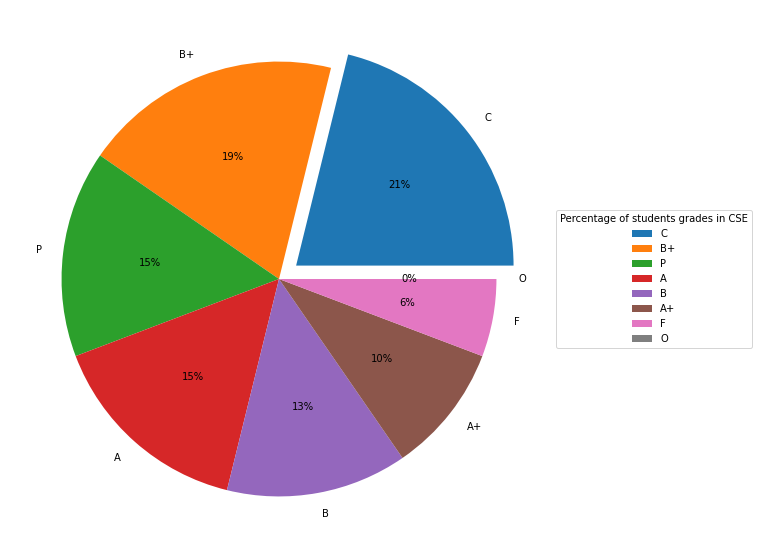

In [33]:
#performing methods on cse
d = cse['Total internal']
c_mean = d.mean()
c_max = d.max()
print(f"class average ---> {c_mean}")
print(f"class max ---> {c_max}")
#plotting the class grade on chart
grade = list(cse['Final Grade'].value_counts().keys())
count_grade = list(cse['Final Grade'].value_counts().values)
plt.figure(figsize=(20,10))

# define Seaborn color palette to use
plt.pie(count_grade, labels=grade,explode=(0.1,0,0,0,0,0,0,0), autopct='%.0f%%')
plt.legend(title = "Percentage of students grades in CSE",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

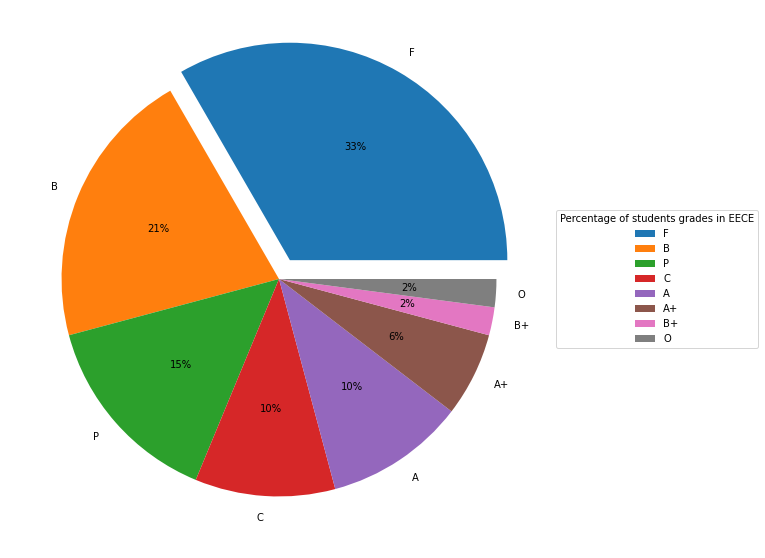

In [34]:
ece['Name'].count()
#plotting the class grade
grade = list(ece['Final Grade'].value_counts().keys())
count_grade = list(ece['Final Grade'].value_counts().values)
plt.figure(figsize=(20,10))

# plotting data on chart
plt.pie(count_grade, labels=grade,explode=(0.1,0,0,0,0,0,0,0), autopct='%.0f%%')
plt.legend(title = "Percentage of students grades in EECE",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

<Figure size 720x720 with 0 Axes>

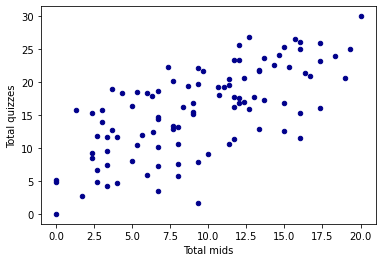

In [44]:
# relationship with mids and quizzes for all sections
final_data.plot.scatter(x='Total mids',y='Total quizzes',c='DarkBlue')
plt.show()

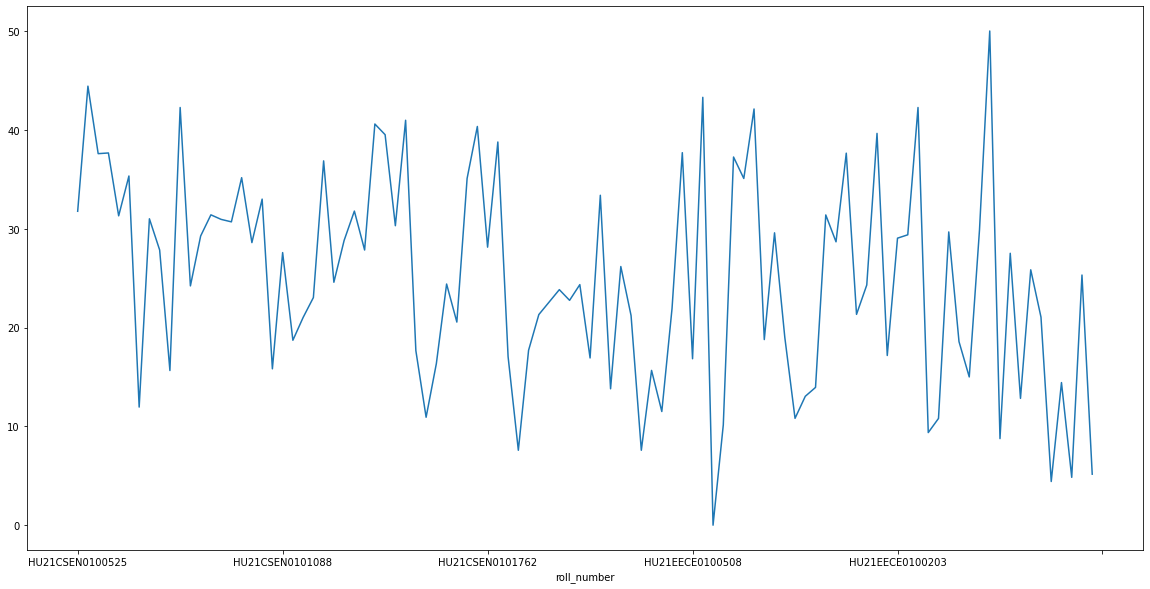

In [45]:
#showing the variation of student total marks
plt.figure(figsize=(20,10))
final_data['Total internal'].plot.line()
plt.show()

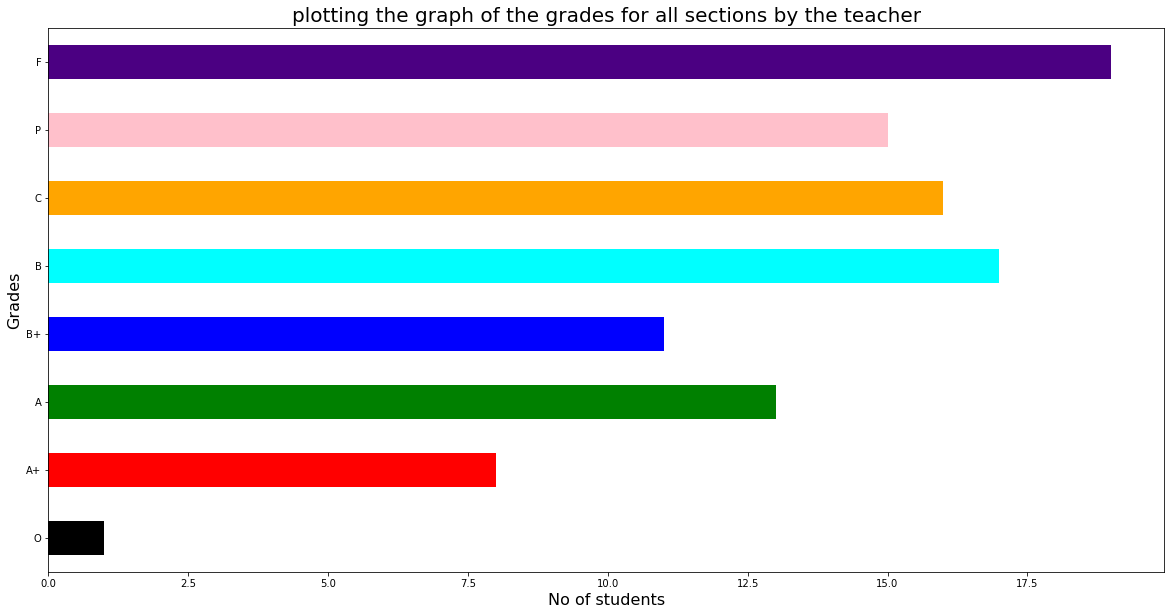

In [56]:
#plotting the graph of the grades for all sections by the teacher
plt.figure(figsize=(20,10))
grade_counts = final_data["Final Grade"].value_counts().sort_index()
grade_counts.plot.barh(color=['black', 'red', 'green', 'blue', 'cyan','orange','pink','indigo'])
plt.ylabel("Grades",fontsize=16)
plt.xlabel("No of students",fontsize=16)
plt.title("plotting the graph of the grades for all sections by the teacher",fontsize=20)
plt.show()

In [41]:
#getting the csv file for each section
for department, table in final_data.groupby("Department"):
    section_file = f"Section {department} Grades.csv"
    num_students = table.shape[0]
    print(
        f"In Section {department} there are {num_students} students saved to "
        f"file {section_file}."
    )
    table.sort_values(by=["Name"]).to_csv(section_file)

In Section CSE there are 52 students saved to file Section CSE Grades.csv.
In Section EECE there are 48 students saved to file Section EECE Grades.csv.


In [42]:
final_data.to_excel("grade.xlsx")